<a href="https://colab.research.google.com/github/aag112/basic01/blob/master/MachineLearningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as plt
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
diabetes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/dataset_diabetes/diabetic_data.csv')

In [22]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [23]:
diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

#Let's train our data based on race 

In [24]:
print(diabetes.groupby('race').size())

race
?                   2273
AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1506
dtype: int64


#We see there are missing values. Let's replace these with numpy nan and drop rows with missing values.

In [25]:
diabetes.dropna(inplace=True)

In [26]:
diabetes.replace('?', np.nan, inplace=True)

In [27]:
print("Patients admitted classified by race")
diabetes.groupby('race').size()

Patients admitted classified by race


race
AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1506
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



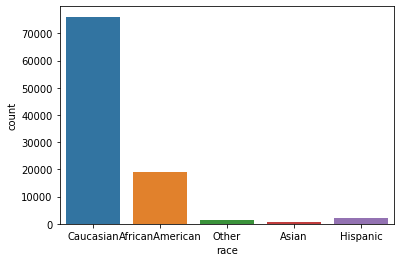

In [28]:
sns.countplot(diabetes['race'],label="Count")

In [29]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [30]:
#convert strings to floats
#fdiabetes = diabetes
#fdiabetes['race'] = pd.to_numeric(fdiabetes['race'],errors='coerce')

In [31]:
df = diabetes.drop(['readmitted', 'diabetesMed', 'change', 'metformin-pioglitazone',
                    'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin',
                    'glyburide-metformin', 'insulin', 'citoglipton', 'examide', 'tolazamide',
                    'troglitazone', 'miglitol', 'acarbose', 'rosiglitazone', 'pioglitazone',
                    'tolbutamide', 'glyburide', 'glipizide', 'acetohexamide', 'glimepiride',
                    'chlorpropamide', 'nateglinide', 'repaglinide', 'metformin', 'A1Cresult',
                    'max_glu_serum', 'number_diagnoses', 'diag_3', 'diag_2', 'diag_1', 'number_inpatient',
                    'number_emergency', 'number_outpatient', 'num_medications', 'num_procedures',
                    'num_lab_procedures', 'medical_specialty', 'payer_code', 'time_in_hospital',
                    'admission_source_id', 'discharge_disposition_id', 'admission_type_id', 'weight',
                    'patient_nbr', 'encounter_id'], axis=1)

In [32]:
df.head()

,race,gender,age
0,Caucasian,Female,[0-10)
1,Caucasian,Female,[10-20)
2,AfricanAmerican,Female,[20-30)
3,Caucasian,Male,[30-40)
4,Caucasian,Male,[40-50)


#Handling categorical features. In this case, race.

In [33]:
df1=pd.get_dummies(diabetes['race'],drop_first=True)

In [34]:
df1.head()

,Asian,Caucasian,Hispanic,Other
0,0,1,0,0
1,0,1,0,0
2,0,0,0,0
3,0,1,0,0
4,0,1,0,0


Add these to our columns in our filtered df variable already made

In [35]:
df=pd.concat([df1,df],axis=1)

In [36]:
df.drop('race',axis=1, inplace=True) #removing the race column

In [37]:
df.head()

,Asian,Caucasian,Hispanic,Other,gender,age
0,0,1,0,0,Female,[0-10)
1,0,1,0,0,Female,[10-20)
2,0,0,0,0,Female,[20-30)
3,0,1,0,0,Male,[30-40)
4,0,1,0,0,Male,[40-50)


In [38]:
df2=pd.get_dummies(diabetes['gender'])

In [39]:
df2.head()

,Female,Male,Unknown/Invalid
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0


In [40]:
df=pd.concat([df2,df],axis=1)

In [41]:
df.drop('gender',axis=1, inplace=True) #removing the gender column

In [42]:
df.head()

,Female,Male,Unknown/Invalid,Asian,Caucasian,Hispanic,Other,age
0,1,0,0,0,1,0,0,[0-10)
1,1,0,0,0,1,0,0,[10-20)
2,1,0,0,0,0,0,0,[20-30)
3,0,1,0,0,1,0,0,[30-40)
4,0,1,0,0,1,0,0,[40-50)


In [43]:
df.drop('Unknown/Invalid',axis=1, inplace=True) #removing the unknown column

In [206]:
df.head()

,Female,Male,Asian,Caucasian,Hispanic,Other,age
0,1,0,0,1,0,0,[0-10)
1,1,0,0,1,0,0,[10-20)
2,1,0,0,0,0,0,[20-30)
3,0,1,0,1,0,0,[30-40)
4,0,1,0,1,0,0,[40-50)


In [44]:
df_dummy2 = pd.get_dummies(df['age'], drop_first = True)

df_dummy2.head()

,[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


In [45]:
df=pd.concat([df, df_dummy2],axis=1)

In [47]:
df.drop('age', axis=1, inplace=True)

In [51]:
df.head()

,Female,Male,Asian,Caucasian,Hispanic,Other,[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0


#Standardizing the Variables

In [52]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
scaler.fit(df.drop('Hispanic',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [56]:
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_features = scaler.transform(df.drop('Hispanic' ,axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Female,Male,Asian,Caucasian,Hispanic,Other,[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90)
0,0.927452,-0.927397,-0.079616,0.580762,-0.12256,-0.082683,-0.128654,-0.196275,-0.324313,-0.451873,-0.532521,-0.586829,-0.450942,-0.167988
1,0.927452,-0.927397,-0.079616,0.580762,-0.12256,12.094359,-0.128654,-0.196275,-0.324313,-0.451873,-0.532521,-0.586829,-0.450942,-0.167988
2,0.927452,-0.927397,-0.079616,-1.721876,-0.12256,-0.082683,7.772761,-0.196275,-0.324313,-0.451873,-0.532521,-0.586829,-0.450942,-0.167988
3,-1.078223,1.078287,-0.079616,0.580762,-0.12256,-0.082683,-0.128654,5.094888,-0.324313,-0.451873,-0.532521,-0.586829,-0.450942,-0.167988
4,-1.078223,1.078287,-0.079616,0.580762,-0.12256,-0.082683,-0.128654,-0.196275,3.083438,-0.451873,-0.532521,-0.586829,-0.450942,-0.167988


#Train test split

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Hispanic'],test_size=0.30)

#Using k-NN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [61]:
pred = knn.predict(X_test)

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
print(confusion_matrix(y_test,pred))

[[29370   551]
 [  577    32]]


In [64]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     29921
           1       0.05      0.05      0.05       609

    accuracy                           0.96     30530
   macro avg       0.52      0.52      0.52     30530
weighted avg       0.96      0.96      0.96     30530



#Choosing a K value

In [68]:
error_rate = []

for i in range(1,15):

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

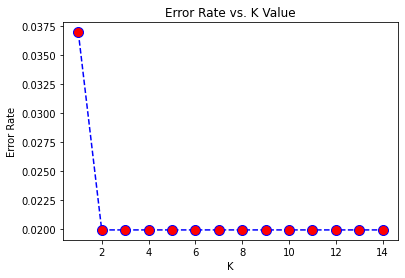

In [70]:
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o', 
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [72]:
knn = KNeighborsClassifier(n_neighbors=30)
#now with K=2
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print("With K=2'")
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

With K=2'


[[29921     0]
 [  609     0]]


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29921
           1       0.00      0.00      0.00       609

    accuracy                           0.98     30530
   macro avg       0.49      0.50      0.49     30530
weighted avg       0.96      0.98      0.97     30530



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#Decision Trees

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [74]:
dtree = DecisionTreeClassifier()

In [75]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#Prediction and Evaluation
let's evaluate our decision tree

In [76]:
predictions = dtree.predict(X_test)

In [77]:
from sklearn.metrics import classification_report,confusion_matrix

In [78]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29921
           1       0.00      0.00      0.00       609

    accuracy                           0.98     30530
   macro avg       0.49      0.50      0.49     30530
weighted avg       0.96      0.98      0.97     30530



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



##Tree Visualization

In [79]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



['Male',
 'Asian',
 'Caucasian',
 'Hispanic',
 'Other',
 '[10-20)',
 '[20-30)',
 '[30-40)',
 '[40-50)',
 '[50-60)',
 '[60-70)',
 '[70-80)',
 '[80-90)',
 '[90-100)']

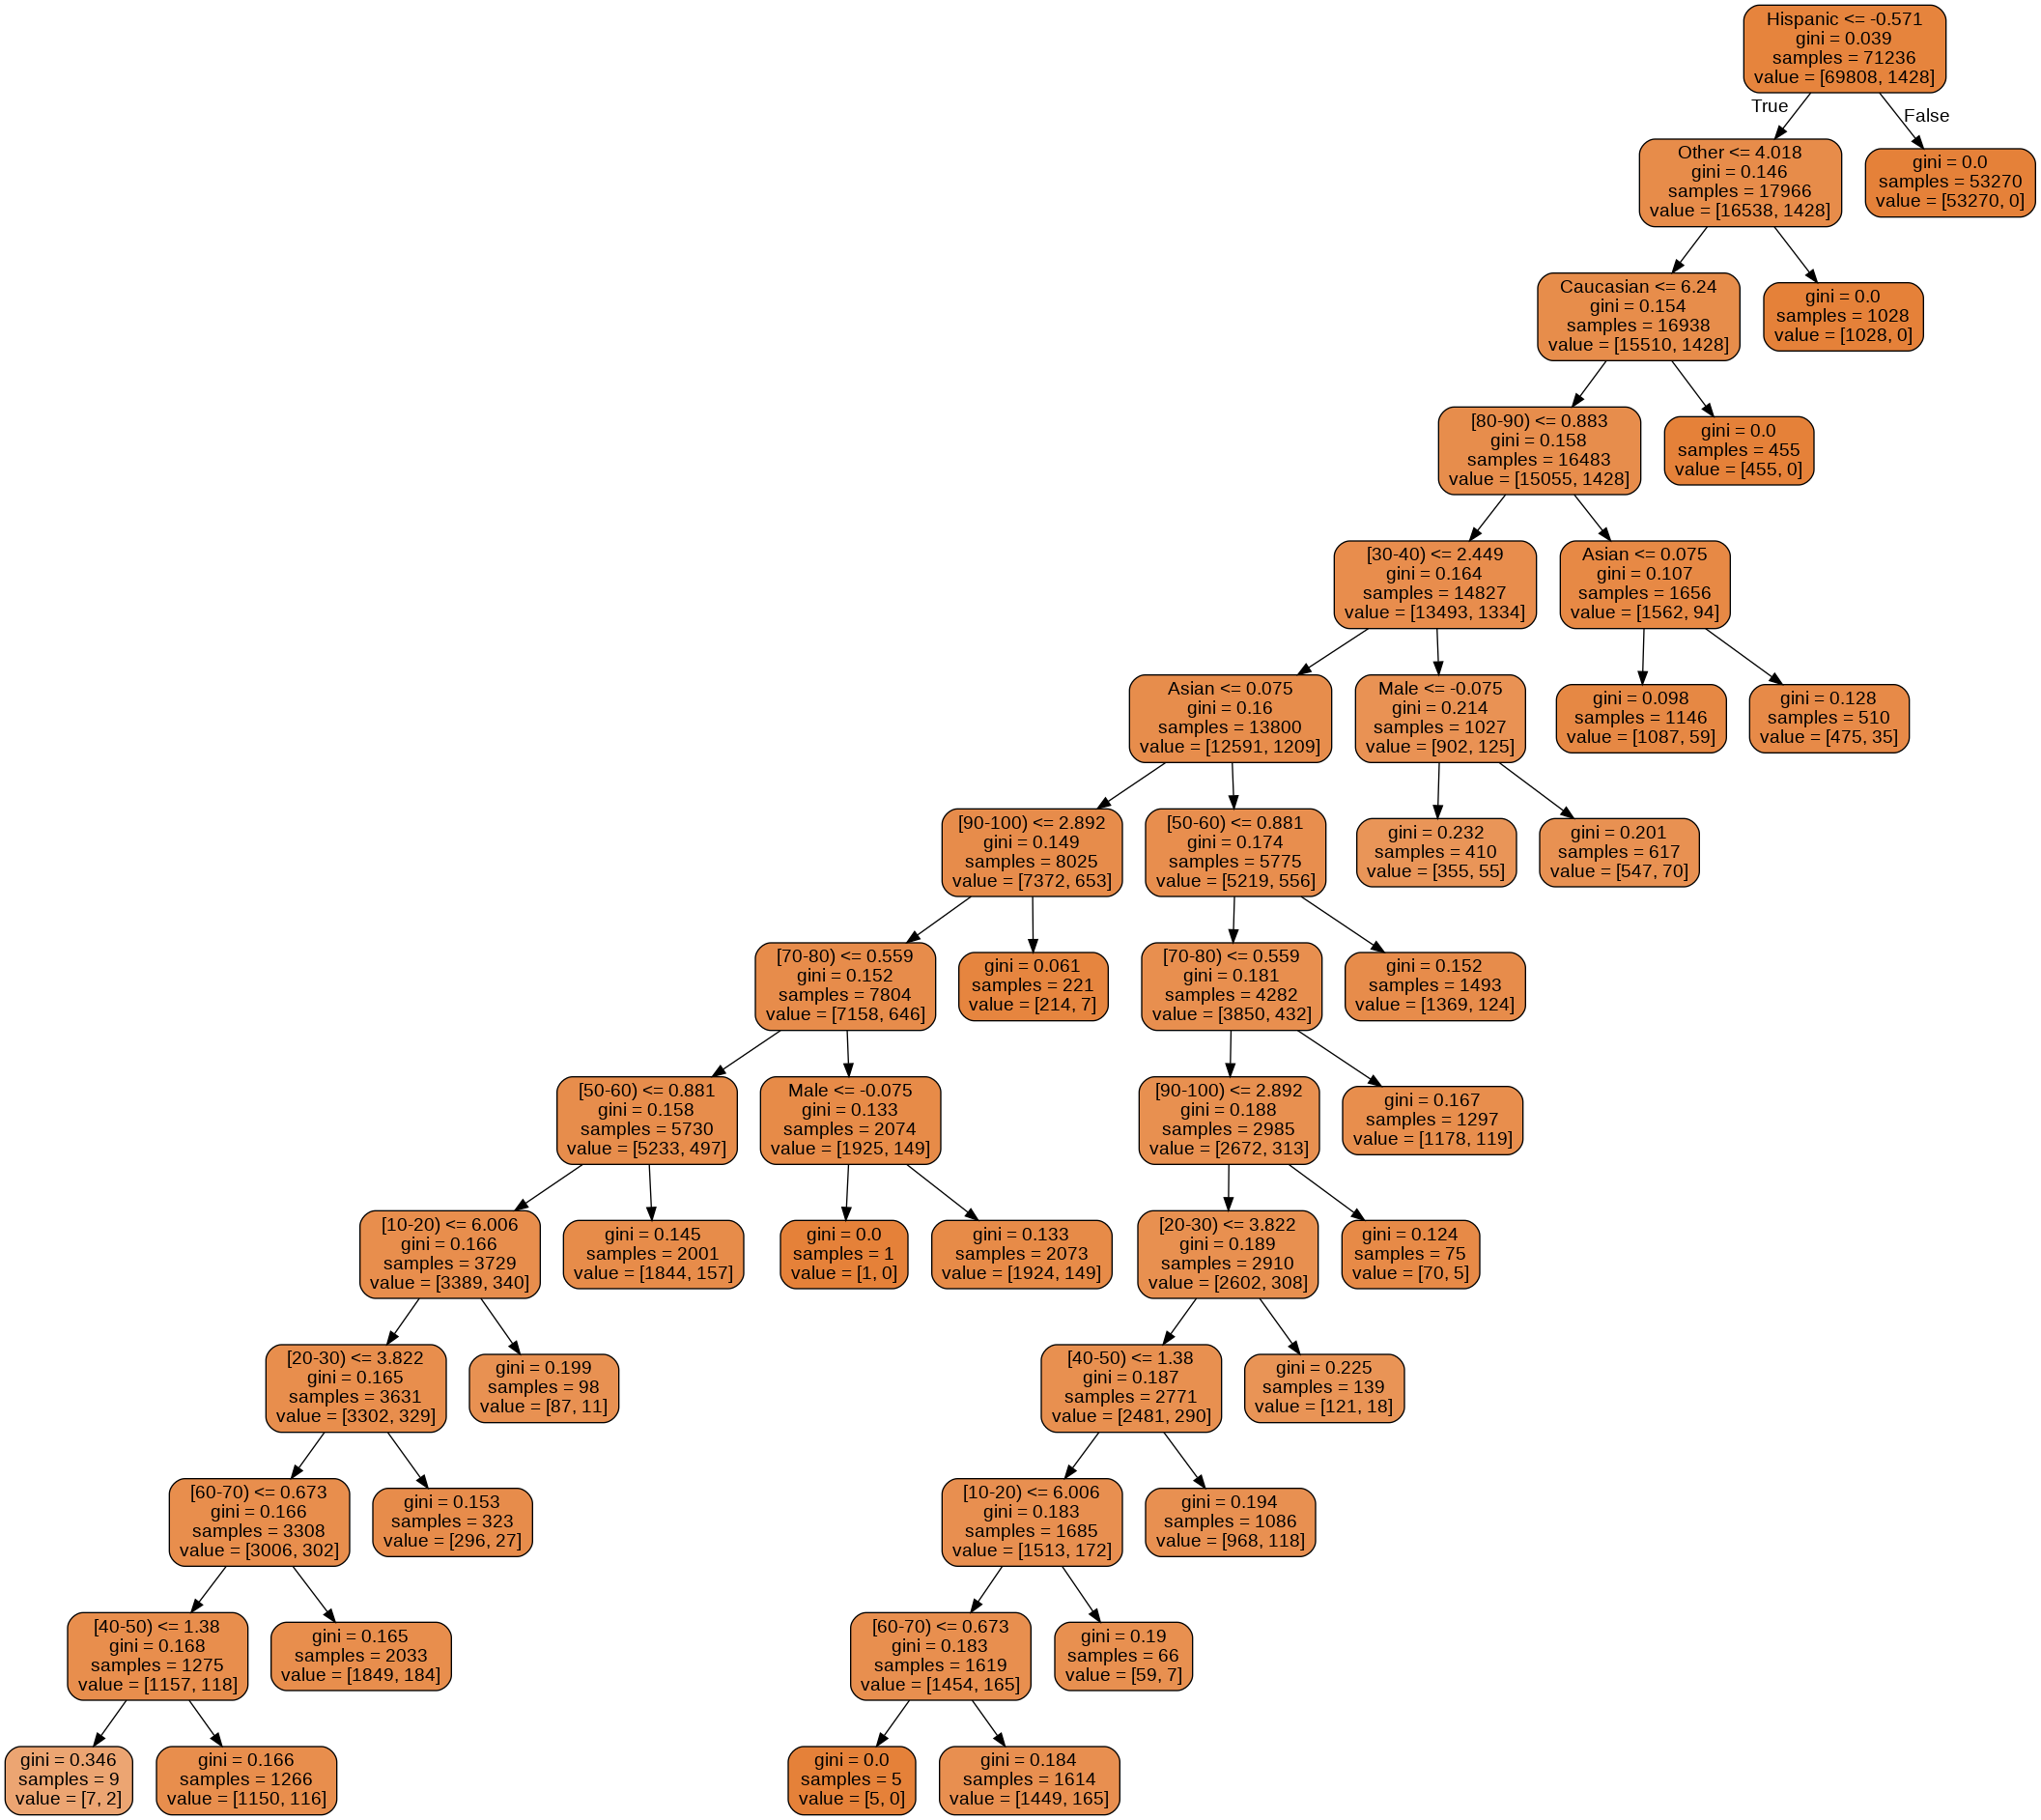

In [80]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
rfc_pred = rfc.predict(X_test)

In [83]:
print(confusion_matrix(y_test,rfc_pred))

[[29921     0]
 [  609     0]]


In [84]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29921
           1       0.00      0.00      0.00       609

    accuracy                           0.98     30530
   macro avg       0.49      0.50      0.49     30530
weighted avg       0.96      0.98      0.97     30530



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

